In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import SHFunctions as shf
import os

from jupyterthemes import jtplot
jtplot.style(theme='monokai')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeGenSingA(3, 2, delta = .00010)
A

array([[[ 0.00000000e+00,  1.97511060e-01,  1.35788940e-01],
        [ 3.04885288e-01,  0.00000000e+00,  2.84147121e-02],
        [ 4.37570433e-02,  2.89542957e-01,  0.00000000e+00]],

       [[-1.00000000e+00,  1.63200069e-01,  1.70099931e-01],
        [ 2.58248634e-02, -1.00000000e+00,  3.07475137e-01],
        [ 1.41091790e-01,  1.92208210e-01, -1.00000000e+00]],

       [[ 1.00000000e-04,  8.12902474e-02,  2.52009753e-01],
        [ 2.21169291e-01,  1.00000000e-04,  1.12130709e-01],
        [ 2.02274686e-01,  1.31025314e-01,  1.00000000e-04]]])

[[0.29042423 0.48400668 0.22526915]
 [0.55829475 0.32520553 0.11619978]
 [0.32883016 0.56421314 0.10665676]]


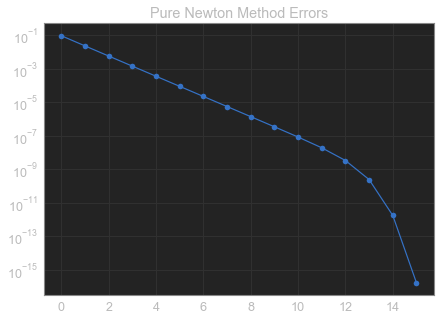

In [3]:
Ss = shf.NewtonPoly(A)
# ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

# ax2.semilogy(Ss['errs'],'-o')
# ax2.semilogy(ss['errs'],'-o')
# ax2.set_xlim(ax1.get_xlim())
# ax2.set_title('Simple Newton Method Errors : xlim sync')

# ax3.semilogy(Ss['errs'],'-o')
# ax3.semilogy(ss['errs'],'-o')
# ax3.set_xlim(ax1.get_xlim())
# ax3.set_ylim(ax1.get_ylim())
# ax3.set_title('Simple Newton Method Errors : xylim sync')

# ax4.semilogy(Ss['errs'],'-o')
# ax4.semilogy(ss['errs'],'-o')
# ax4.set_title('Simple Newton Method Errors')

print(Ss['sol'])

### Eigenvalues of $P'_{X_{i}}$'s 

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

In [5]:
dss = np.zeros((Ds[-1].shape[0],len(Ds)))
dss = dss.astype(complex)
for i in range(len(EVs)):
    dss[:,i] = np.squeeze(Ds[i])

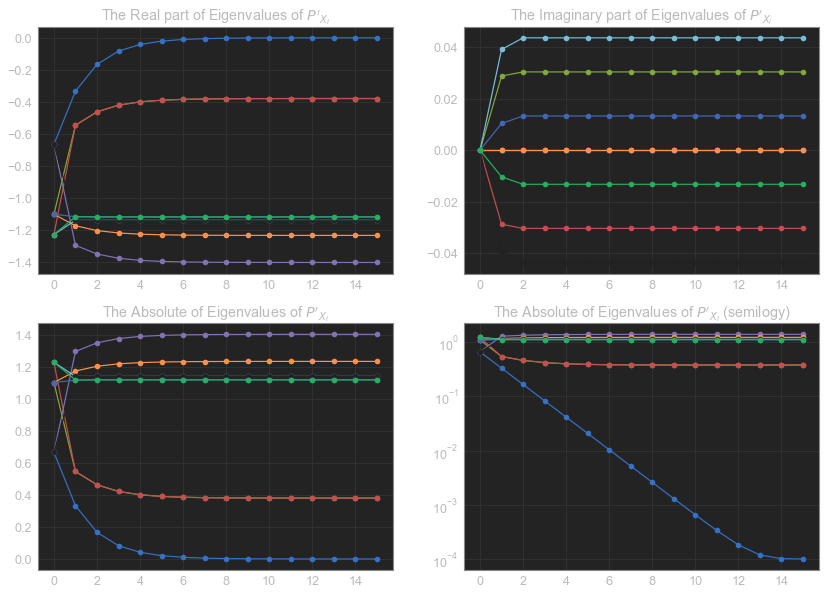

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    ax1.plot(np.real(dss[i,:]),'-o')
    ax2.plot(np.imag(dss[i,:]),'-o')
    ax3.plot(np.abs(dss[i,:]),'-o')
    ax4.semilogy(np.abs(dss[i,:]),'-o')

### Ordered Eigenvalues of $P'_{X_{i}}$'s 

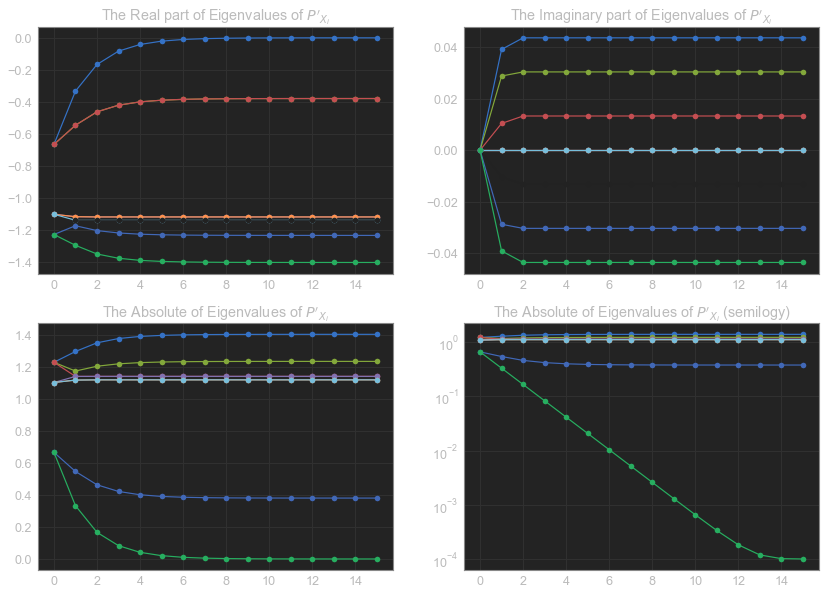

In [7]:
rdss = np.sort(np.real(dss), axis = 0)
rdss = rdss[::-1,:]

idss = np.sort(np.imag(dss), axis = 0)
idss = idss[::-1,:]

adss = np.sort(np.abs(dss), axis = 0)
adss = adss[::-1,:]

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    ax1.plot(rdss[i,:],'-o')
    ax2.plot(idss[i,:],'-o')
    ax3.plot(adss[i,:],'-o')
    ax4.semilogy(adss[i,:],'-o')

### Coefficients of Eigenvectors of $P'_{X_{i}}$ with respect to $H_{i}$

In [8]:
coeffi = np.zeros((Ss['Hs'][0].shape[0] * Ss['Hs'][0].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

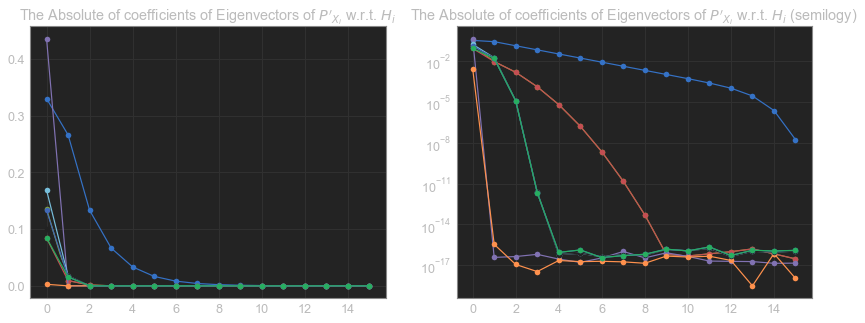

In [9]:
fig = plt.figure(figsize=(14,5))
# ax1 = fig.add_subplot(221)
# ax1.set_title("The Real part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

# ax2 = fig.add_subplot(222)
# ax2.set_title("The Imaginary part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax3 = fig.add_subplot(121)
ax3.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax4 = fig.add_subplot(122)
ax4.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$ (semilogy)")

for i in range(coeffi.shape[0]):
#     ax1.plot(np.real(coeffi[i,:]),'-o')
#     ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')

### Ordered absolute values of coefficients

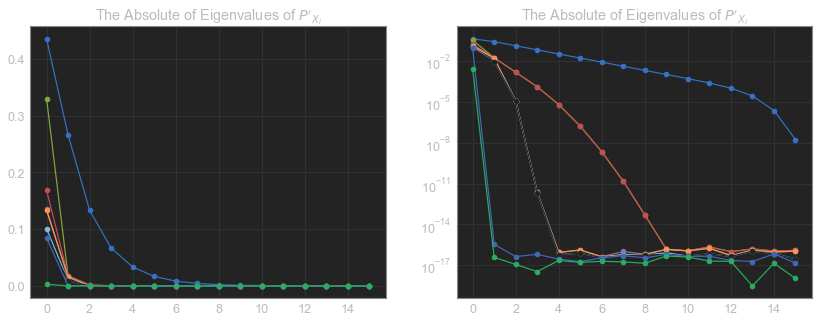

In [10]:
# pprint(abs(coeffi))
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax1.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(122)
ax2.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

abcoe = np.sort(np.abs(coeffi), axis = 0)
abcoe = abcoe[::-1,:]
for i in range(abcoe.shape[0]):
    ax1.plot(abcoe[i,:],'-o')
    ax2.semilogy(abcoe[i,:],'-o')

### Norm Distances of between Eigenvectors of $X_{i}$ and $X_{i+1}$

In [11]:
Xevecs = []
for X in Ss['Xs']:
    d, ev = nla.eig(X)
    Xevecs.append(ev)
# pprint(Xevecs)

i = 0
for X in Xevecs:
    if i != 0:
        for j in range(X.shape[0]):
            if np.sign(X0[0,j]) == np.sign(X[0,j]):
                print('  {:.16e}'.format(nla.norm(X0[:,j] - X[:,j])), end='')
            else:
                print('  {:.16e}'.format(nla.norm(X0[:,j] + X[:,j])), end='')
        print('')
    else:
        i += 1
    X0 = X

  9.1940168676196610e-01  1.0760217015135038e+00  1.8835014844588416e+00
  2.4825341532472731e-16  2.0807120121690146e-02  2.0807120121690146e-02
  3.5108334685767012e-16  1.1263230726400422e-03  1.1263230726400422e-03
  3.5108334685767012e-16  9.2157013484217356e-05  9.2157013484217356e-05
  5.2074075716206700e-16  4.3610040630262007e-06  4.3610040630262007e-06
  2.4825341532472731e-16  1.1072028545064627e-07  1.1072028545064627e-07
  1.5700924586837752e-16  1.4540063680266359e-09  1.4540063680266359e-09
  2.4825341532472731e-16  9.7052024006220261e-12  9.7052024006220261e-12
  1.5700924586837752e-16  3.2660848061697526e-14  3.2660848061697526e-14
  5.6610488670036757e-16  5.0876810486276012e-16  5.0876810486276012e-16
  2.4825341532472731e-16  1.1143785838488147e-15  1.1143785838488147e-15
  4.1540741810552243e-16  7.7517104089924408e-16  7.7517104089924408e-16
  5.0876810486276012e-16  8.8121220689283099e-16  8.8121220689283099e-16
  5.9787339602818165e-16  2.8977671675840951e-16  2